# HDML

This notebook explores the [heart disease dataset maintained by UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease) by visualizing the data and building machine learning models in order to try and classify if an individual has heart disease.

## Utils and Constants

In [1]:
# Utility functions, and constants
import os

ROOT_DIR = "."
IMAGES_DIR = os.path.join(ROOT_DIR, "images")
DATA_DIR = os.path.join(ROOT_DIR, "data")

os.makedirs(IMAGES_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)

def save_fig(figure_name: str, tight_layout: bool = True, fig_extension: str = "png", resolution: int = 300) -> None:
    """Saves the figure with the specified figure name"""

    # Path of the image being saved
    path = os.path.join(IMAGES_DIR, figure_name + "." + fig_extension)

    # Save the image
    print("Saving figure", figure_name)

    if tight_layout:
        plt.tight_layout()

    plt.savefig(path, format=fig_extension, dpi=resolution)

## Download the Data

In [2]:
import requests

DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/"

cleveland = DATA_URL + "cleveland.data"
processed_cleveland = DATA_URL + "processed.cleveland.data"

cleveland_path = os.path.join(DATA_DIR, "raw_cleveland.data")
processed_cleveland_path = os.path.join(DATA_DIR, "cleaned_cleveland.csv")

def download_data(url: str, path: str, verbose: int = 0) -> None:
    """Downloads the data from the specified url and saves it to the specified path"""

    if verbose:
        print(f"Downloading dataset from {url} ...")
    
    response = requests.get(url)
    
    with open(path, "wb") as file:
        file.write(response.content)
        
        if verbose:
            print(f"\nFile saved!\nLocation: {path}")    

In [3]:
download_data(cleveland, cleveland_path, verbose=1)


File saved!
Location: ./data/raw_cleveland.data


In [4]:
download_data(processed_cleveland, processed_cleveland_path,verbose=1)


File saved!
Location: ./data/cleaned_cleveland.csv


### Adding Headers to the Downloaded Data

The downloaded data does not have any headers in the file, so we will manually added it to the cleaned dataset. There is a description of the headers on the site linked at the top of this notebook. For completeness, descriptions will also be added here in this notebook.

|**Feature**|**Description**|
|:-:|:-|
|age|Age in years|
|sex|Sex; 0 means female, 1 means male|
|cp|Chest pain type, of which there are four categories: 1 means typical angina, 2 means atypical angina, 3 means non-anginal pain, and 4 means asymptomatic|
|trestbps|Resting blood pressure, measured in mm Hg on admission to the hospital|
|chol|Serum cholesterol measured in mg/dl|
|fbs|Fasting blood sugar; 1 means > 120 mg/dl, 0 otherwise|
|restecg|Resting electrocardiographic results in which there are 3 catgories: 0 means normal, 1 means the individual has ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), and 2 means the individual is showing probable or definite left ventricular hypertrophy by Estes' criteria|
|thalach|Maximum heart rate achieved|
|exang|Exercise induced angina, where 1 means yes and 0 means no|
|oldpeak|ST depression induced by exercise relative to rest|
|slope|The slope of the peak exercise ST Segment of which there are 3 categories: 1 means upsloping, 2 means flat, and 3 means downsloping|
|ca|Number of major vessels (0-3) colored by flourosopy|
|thal|Thalassemia, where 3 is normal, 6 is fixed defect, and 7 is reversable defect|
|num|Presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.|

In [5]:
cleveland_headers_string = "age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num"

download_data(processed_cleveland, processed_cleveland_path, verbose=0)

with open(processed_cleveland_path, "r") as file:
    data = cleveland_headers_string + "\n" + file.read()

with open(processed_cleveland_path, "w+") as file:    
    file.write(data)

## Exploring and Visualizing the Data

In [6]:
import pandas as pd

heart_disease = pd.read_csv(processed_cleveland_path)
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [8]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


We can see that there are no null values in this dataset, so no extra work will be needed there. There are a couple of observations that we can make however about the data:
- There are more data points for males than females. Males are represented by a `1` while females are represented by a `0`. Since the mean is around `.68` we know that almost 68% of the data points are men.
- All of the records in this data set are adults, in particular they are all over the age of 29. It would have been nice to see more datapoints from younger adults, as anecdotal evidence would suggest that older individuals are more susceptible to heart disease.

Let's also add an extra column that is binary, indicating whether or not someone has heart disease in general

In [9]:
import numpy as np

heart_disease["heart_disease"] = np.where(heart_disease["num"] == 0, 0, 1)

Saving figure attribute_histogram_plots


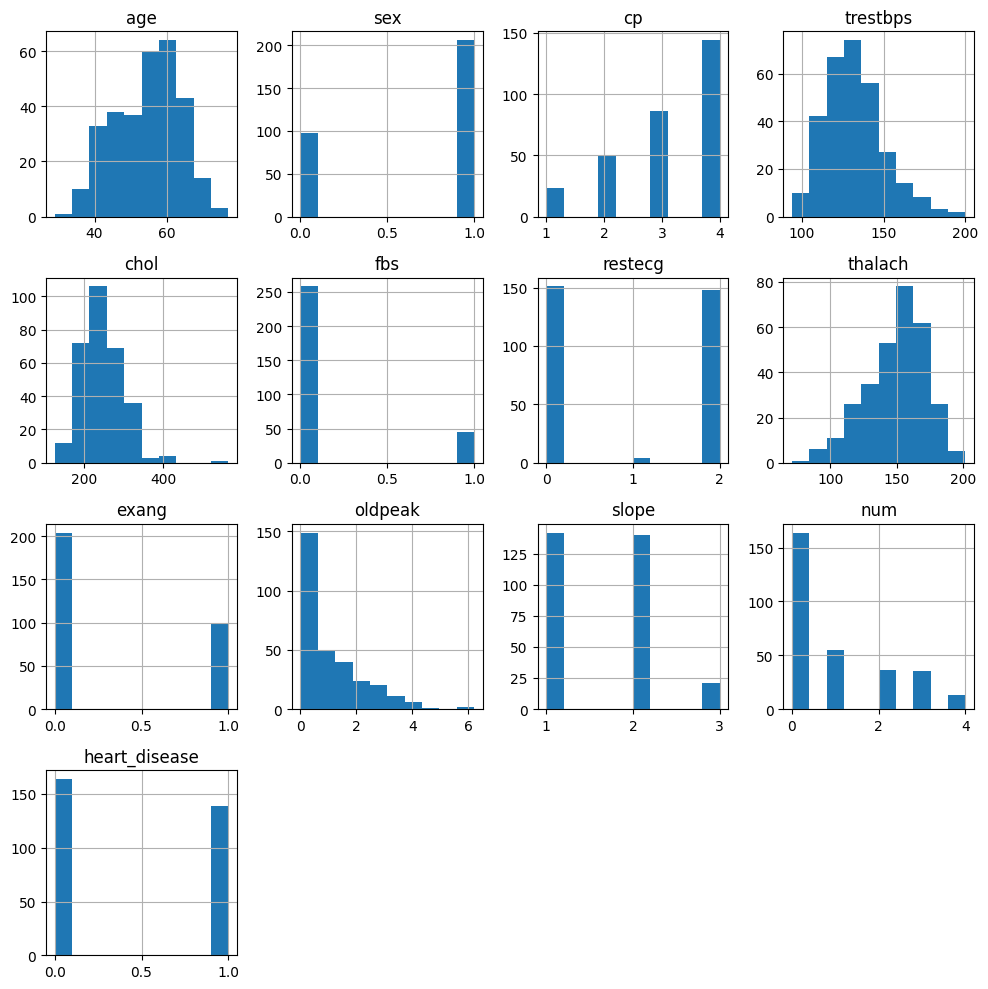

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

heart_disease.hist(figsize=(10, 10))
save_fig("attribute_histogram_plots")
plt.show()

We can also see that this dataset is slightly imbalanced when it comes to the number of people who have no heart disease compared to those that have some type of heart disease.

### Linear Relationships?

Let's construct a correlation matrix to see if there are any linear relationships. It's important to remember that this will miss out on any non-linear relationships

In [11]:
correlation_matrix = heart_disease.corr()

In [12]:
correlation_matrix["heart_disease"].sort_values(ascending=False)

heart_disease    1.000000
num              0.830081
exang            0.431894
oldpeak          0.424510
cp               0.414446
slope            0.339213
sex              0.276816
age              0.223120
restecg          0.169202
trestbps         0.150825
chol             0.085164
fbs              0.025264
thalach         -0.417167
Name: heart_disease, dtype: float64